#### Cleaning data and analyzing Tito Jackson percentages by percent Black population per precinct

# General Mayoral Race 2017 Demographics Analysis (All Boston Precincts)

In [11]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# processing data
def clean_data(filename): # removes any lines with nan values
    df = pd.read_csv(filename)
    #replacing empty entries with nan
    df.replace(r'', np.nan)
    #cleaning data
    cleaned_df = df[~pd.isnull(df).any(axis = 1)]
    return cleaned_df

def find_top_precincts(df, col_name):
    BP_data = df[[col_name]].to_numpy() # creating numpy array of Black percentages
    precinct_data = df[["Precinct"]].to_numpy() # creating numpy array of Precinct labels
    desc_data = df.sort_values(by = col_name, ascending = False)
    desc_data = desc_data[[col_name]].to_numpy()
    labels = []
    for i in range(np.shape(BP_data)[0]):
        if float(BP_data[i]) > float(desc_data[6]):
            labels.append(int(precinct_data[i]))
        else:
            labels.append("Other")
    return labels

df = clean_data("Mayor2017Turnout.csv")

# votes for Tito Jackson by race
df['TopPrecincts'] = find_top_precincts(df, "Black Percentage")
sns.lmplot(x="Black Percentage", y="Jackson Percentage of votes", hue ='TopPrecincts', data=df, height = 4, aspect = 2.5);

#### Calculating the correlation coefficient between the Black Percentage column and the Jackson Percentage of votes column

In [ ]:
BP_Jackson = df[["Black Percentage", "Jackson Percentage of votes"]]
correlation = BP_Jackson.corr(method='pearson')
print(correlation)

                             Black Percentage  Jackson Percentage of votes
Black Percentage                       1.0000                       0.4292
Jackson Percentage of votes            0.4292                       1.0000


Correlation coefficient of 0.4292 indicates a slight positive correlation between the two variables.

#### Analyzing Martin Walsh percentages by percent Black population per precinct

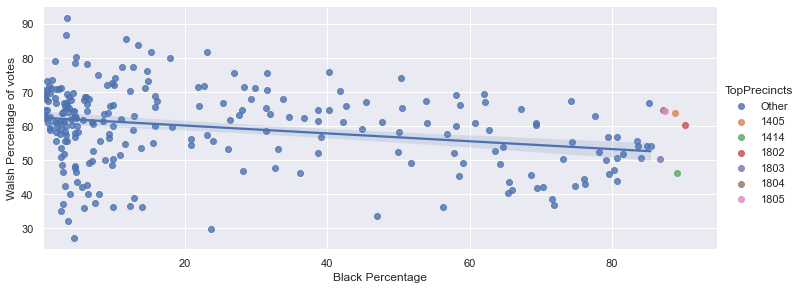

In [ ]:
sns.lmplot(x="Black Percentage", y="Walsh Percentage of votes", hue ='TopPrecincts', data=df, height = 4, aspect = 2.5);

#### Calculating the correlation coefficient between the Black Percentage column and the Walsh Percentage of votes column

In [ ]:
BP_Walsh = df[["Black Percentage", "Walsh Percentage of votes"]]
correlation2 = BP_Walsh.corr(method='pearson')
print(correlation2)

                           Black Percentage  Walsh Percentage of votes
Black Percentage                   1.000000                  -0.252697
Walsh Percentage of votes         -0.252697                   1.000000


Correlation coefficient of -0.2527 indicates a slight negative correlation between the two variables.

#### Analyzing Jackon percentages by white percentage

In [12]:
# votes for Tito Jackson by race
df['TopPrecincts'] = find_top_precincts(df, "White Percentage")
sns.lmplot(x="White Percentage", y="Jackson Percentage of votes", hue ='TopPrecincts', data=df, height = 4, aspect = 2.5);

Note that precincts 6 and 7 constitute South Boston.

In [13]:
WP_Jackson = df[["White Percentage", "Jackson Percentage of votes"]]
correlation = WP_Jackson.corr(method='pearson')
print(correlation)

                             White Percentage  Jackson Percentage of votes
White Percentage                     1.000000                    -0.428137
Jackson Percentage of votes         -0.428137                     1.000000


#### Analyzing Walsh percentages by white percentage

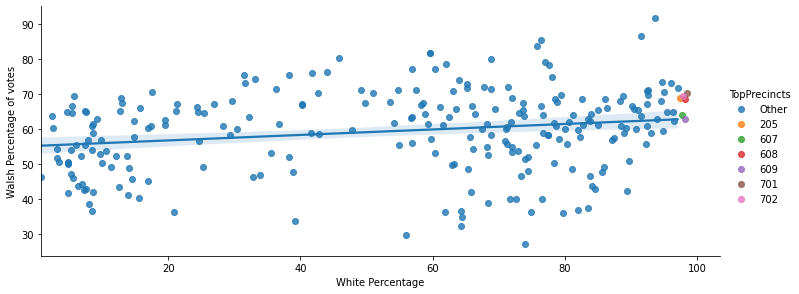

In [14]:
# votes for Tito Jackson by race
df['TopPrecincts'] = find_top_precincts(df, "White Percentage")
sns.lmplot(x="White Percentage", y="Walsh Percentage of votes", hue ='TopPrecincts', data=df, height = 4, aspect = 2.5);

In [15]:
WP_Walsh = df[["White Percentage", "Walsh Percentage of votes"]]
correlation = WP_Walsh.corr(method='pearson')
print(correlation)

                           White Percentage  Walsh Percentage of votes
White Percentage                   1.000000                   0.223023
Walsh Percentage of votes          0.223023                   1.000000


There is not a strong positive correlation between these two variables.

# Dorcester Mayoral Race Demographic Analysis
Dorcester precincts include 15, 16, 17.

Text(0.5, 1.0, 'Black Percentage by Precinct')

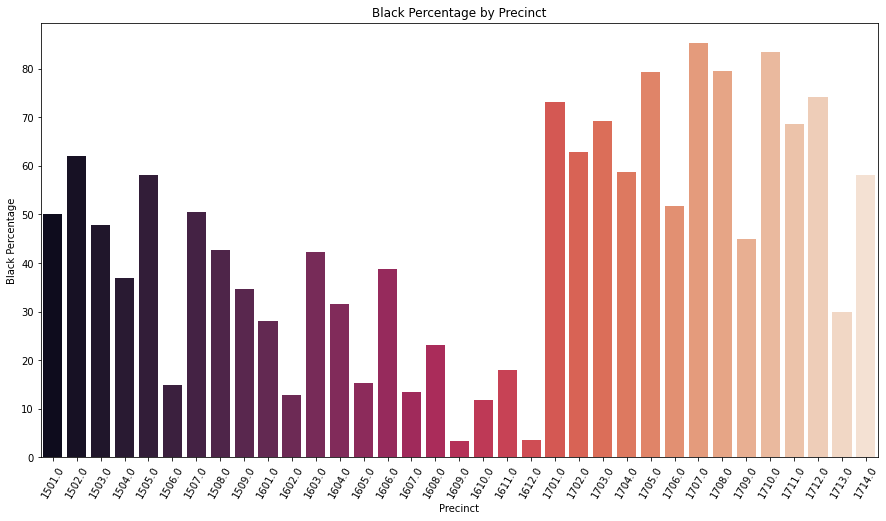

In [4]:
# processing data to only include Dorcester data 
def Dorcester_precincts(filename):
    df = clean_data(filename)
    data_array = df.to_numpy()
    
    rows = []
    for i in range(np.shape(data_array)[0]):
        current_p = str(int(data_array[i, 16]))
        if len(current_p) == 4:
            if current_p[0:2] == '15' or current_p[0:2] == '16' or current_p[0:2] == '17':
                rows.append(data_array[i].tolist())
    
    Dorcester_df = pd.DataFrame(np.asarray(rows), columns = df.columns)
    return Dorcester_df

df = Dorcester_precincts('Mayor2017Turnout.csv')
plt.figure(figsize=(15,8))
g = sns.barplot(x="Precinct", y="Black Percentage", data=df, palette = 'rocket')
g.set_xticklabels(g.get_xticklabels(), rotation=60);
g.set_title("Black Percentage by Precinct")

#### Jackson Percentage Plotted by Black Percentage

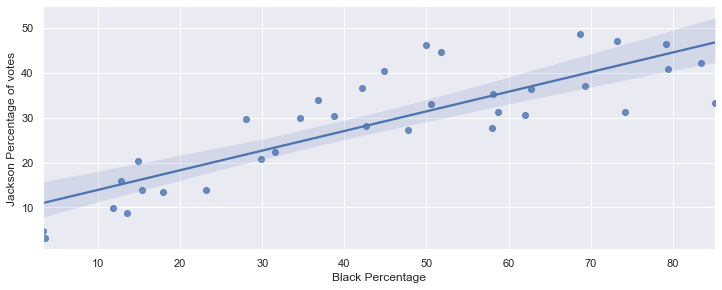

In [ ]:
df['TopPrecincts'] = find_top_precincts(df, "Black Percentage")
sns.lmplot(x="Black Percentage", y="Jackson Percentage of votes", data=df, height = 4, aspect = 2.5);

In [ ]:
BP_Jackson = df[["Black Percentage", "Jackson Percentage of votes"]]
correlation = BP_Jackson.corr(method='pearson')
print(correlation)

                             Black Percentage  Jackson Percentage of votes
Black Percentage                     1.000000                     0.841967
Jackson Percentage of votes          0.841967                     1.000000


#### Jackson Percentage Plotted by White Percentage

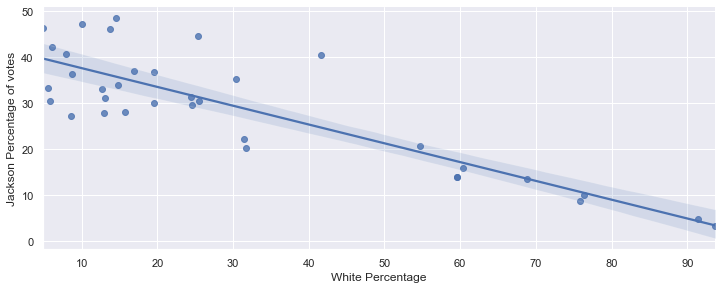

In [ ]:
sns.lmplot(x="White Percentage", y="Jackson Percentage of votes", data = df, height = 4, aspect = 2.5);

In [ ]:
WP_Jackson = df[["White Percentage", "Jackson Percentage of votes"]]
correlation = WP_Jackson.corr(method='pearson')
print(correlation)

                             White Percentage  Jackson Percentage of votes
White Percentage                     1.000000                    -0.853734
Jackson Percentage of votes         -0.853734                     1.000000


#### Jackson Percentage plotted by Hispanic Percentage

In [5]:
sns.lmplot(x="Hispanic Percentage", y="Jackson Percentage of votes", data = df, height = 4, aspect = 2.5)

In [7]:
HP_Jackson = df[["Hispanic Percentage", "Jackson Percentage of votes"]]
correlation = HP_Jackson.corr(method='pearson')
print(correlation)

                             Hispanic Percentage  Jackson Percentage of votes
Hispanic Percentage                     1.000000                     0.612856
Jackson Percentage of votes             0.612856                     1.000000


#### Walsh Percentage plotted by Black Percentage

In [ ]:
sns.lmplot(x="Black Percentage", y="Walsh Percentage of votes", data = df, height = 4, aspect = 2.5);

In [ ]:
BP_Walsh = df[["Black Percentage", "Walsh Percentage of votes"]]
correlation = BP_Walsh.corr(method='pearson')
print(correlation)

                           Black Percentage  Walsh Percentage of votes
Black Percentage                    1.00000                   -0.78711
Walsh Percentage of votes          -0.78711                    1.00000


#### Walsh Percentage plotted by White Percentage

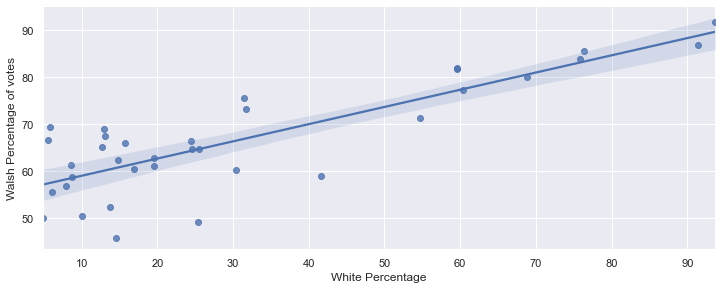

In [ ]:
sns.lmplot(x="White Percentage", y="Walsh Percentage of votes", data = df, height = 4, aspect = 2.5);

In [ ]:
WP_Walsh = df[["White Percentage", "Walsh Percentage of votes"]]
correlation = WP_Walsh.corr(method='pearson')
print(correlation)

                           White Percentage  Walsh Percentage of votes
White Percentage                   1.000000                   0.826976
Walsh Percentage of votes          0.826976                   1.000000


#### Walsh percentage plotted by Hispanic Percentage

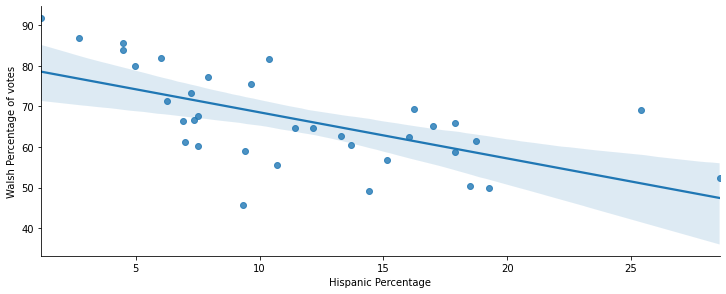

In [8]:
sns.lmplot(x="Hispanic Percentage", y="Walsh Percentage of votes", data = df, height = 4, aspect = 2.5);

In [9]:
HP_Walsh = df[["Hispanic Percentage", "Walsh Percentage of votes"]]
correlation = HP_Walsh.corr(method='pearson')
print(correlation)

                           Hispanic Percentage  Walsh Percentage of votes
Hispanic Percentage                   1.000000                  -0.614818
Walsh Percentage of votes            -0.614818                   1.000000
